# Dataverwerking

## Importeren modules

In [51]:
# For interactive plots
%matplotlib widget

In [81]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import models
from scipy.stats import chi2
import csv
import math as mt
from scipy.ndimage import gaussian_filter1d

## Data (uit labjournaal) invoeren

In [53]:

list_count_A = []

#pulseheight in mV
L_pulseheight = []


with open('cal_Ge_Na_2.csv', mode='r') as spectrum_Na:
    csv_reader = csv.reader(spectrum_Na)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, count_A, count_B = row

        list_count_A.append(float(count_A))
        L_pulseheight.append(float(pulseheigt))

### Pandas DataFrame

In [54]:
# Create the Pandas DataFrame with column names are provided explicitly
df = pd.DataFrame({'counts': list_count_A, 
                   'Pulseheight (mV)': L_pulseheight})
 
# Print DataFrame
df

,counts,Pulseheight (mV)
0,0.0,1.911765
1,81.0,5.735294
2,141.0,9.558824
3,531.0,13.382353
4,537.0,17.205882
...,...,...
250,2.0,957.794118
251,0.0,961.617647
252,0.0,965.441176
253,0.0,969.264706


Maxima vinden

In [55]:
max_A1 = max(list_count_A)
index_max_A1 = list_count_A.index(max_A1)

max_A2 = max(list_count_A[index_max_A1 + 2:])
index_max_A2 = list_count_A.index(max_A2, index_max_A1 + 2)

# associated pulseheights
pulseheight_A1 = float(L_pulseheight[index_max_A1])
pulseheight_A2 = float(L_pulseheight[index_max_A2])

Peaks

In [56]:
peaks = pd.DataFrame({'Energy': [511, 1275],
                      'pulseheight': [pulseheight_A1, pulseheight_A2]})

peaks

,Energy,pulseheight
0,511,189.264706
1,1275,468.382353


### Onzekerheid toevoegen

In [57]:
# Error of ??? quantity x ??? in ??? unit ???
peaks['err_ph'] = (L_pulseheight[3]-L_pulseheight[2]) / 2

# Error of ??? quantity y ??? in ??? unit ???
# peaks['err_E'] = []

# Print DataFrame
peaks

,Energy,pulseheight,err_ph
0,511,189.264706,1.911765
1,1275,468.382353,1.911765


### Diagram

Text(0, 0.5, 'Y-Grootheid ($\\Psi$-eenheid)')

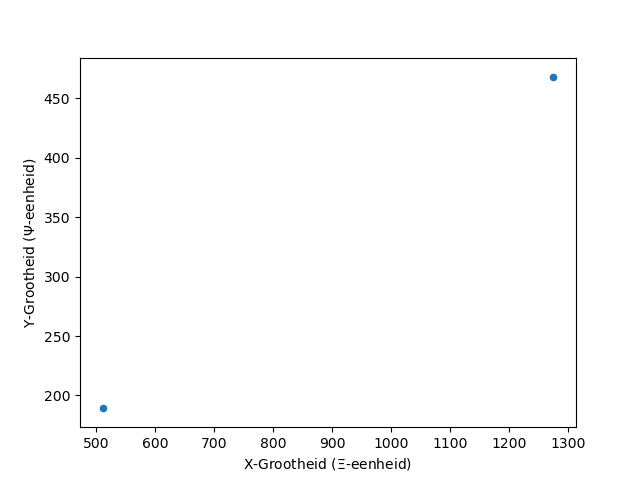

In [58]:
# Create diagram 
ax = peaks.plot.scatter('Energy', 'pulseheight',  yerr='err_ph')

# Set axis labels
ax.set_xlabel('X-Grootheid ($\\Xi$-eenheid)')
ax.set_ylabel('Y-Grootheid ($\\Psi$-eenheid)')

# Set axis view limits
# ax.set_xlim(0, 28)
# ax.set_ylim(0, 28)

## Fitten

\begin{equation}
grootheid \space y = \text{iets met grootheid x}
\end{equation}

### Fitfunctie in python

In [59]:
# Define fit function
def fit_function (energy, a, b):
    y = a * energy + b
    return y

# Create a model from the fit function
MI_model = models.Model(fit_function, name="Fit Na-22")

### Fitten aan de data

In [60]:
# Use the model to fit the data
fit_result = MI_model.fit(peaks['pulseheight'], energy=peaks['Energy'], weights=1/peaks['err_ph'], a=1, b=0)

### Plot fitresultaat

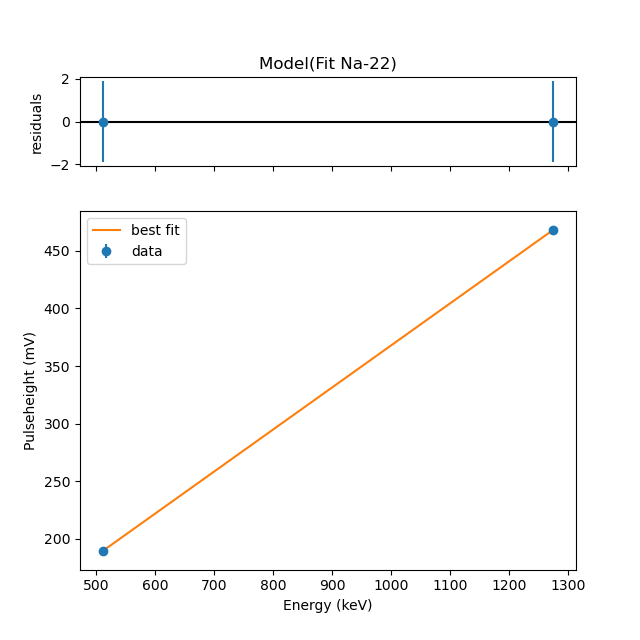

In [61]:
# plot fit including residuals
fit_result.plot()

# Set axis labels
plt.xlabel("Energy (keV)")
plt.ylabel("Pulseheight (mV)")

# Set axis view limits
# plt.xlim(0, 28)
# plt.ylim(0, 28)

# Remove title
plt.title(None);

### Fitresultaat en statistiek

In [62]:
fit_result

Check van de fit

In [63]:
a = 0.36533723
b = 2.57737912

count_A_Cs = []
pulseheight_Cs = []
with open('cal_Ge_Cs_2.csv', mode='r') as spectrum_Cs:
    csv_reader = csv.reader(spectrum_Cs)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, count_A, count_B = row

        pulseheight_Cs.append(float(pulseheigt))
        count_A_Cs.append(float(count_A))

peak_A= max(count_A_Cs)
index = count_A_Cs.index(peak_A)
print(peak_A, index)
peak_Ph = pulseheight_Cs[index]
print(peak_Ph)

Energy = (peak_Ph - b)/a

print(Energy)

6445.0 63
242.79411764705884
657.5205558082839


### Pulseheight naar energie plotten 

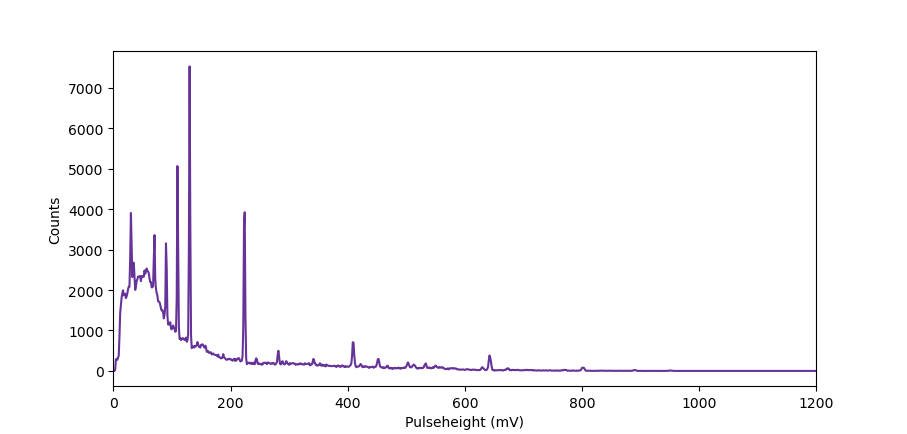

In [124]:
plt.clf()

list_count_A = []
L_pulseheight = []

with open('book4_7200_1024bins.csv', mode='r') as spectrum:
    csv_reader = csv.reader(spectrum)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, count_A, count_B = row

        list_count_A.append(float(count_A ))
        L_pulseheight.append((float(pulseheigt)))
        # print(count_A)

plt.plot(L_pulseheight, list_count_A, linestyle = 'solid', label = "Book 1", color = "rebeccapurple")
plt.xlabel("Pulseheight (mV)")
plt.ylabel("Counts")
plt.xlim(0,1200)
plt.show()

achtergrond loesoe

[-8.72693181e+00 -5.38201973e+00 -2.03710765e+00 ...  3.40308339e+03
  3.40642830e+03  3.40977321e+03] [-2.03710765e+00  1.30780443e+00  4.65271651e+00 ...  3.40977321e+03
  3.41311813e+03  3.41646304e+03]
3.344912080481796


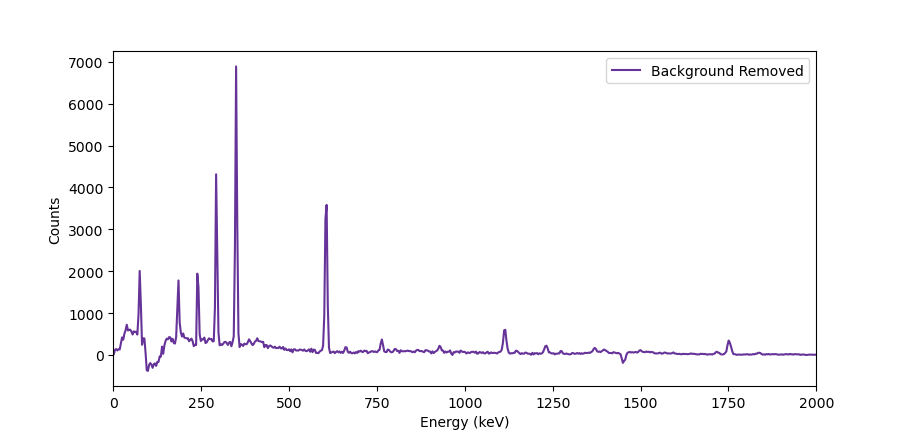

In [122]:
background_counts = []
background_pulseheight = []

with open('background_7200s_1024bins.csv', mode='r') as background:
    csv_reader = csv.reader(background)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, count_A, count_B = row

        background_counts.append(float(count_A ))
        background_pulseheight.append((float(pulseheigt) - 2.577)/0.3653)

background_removed = []
for i in range(len(list_count_A)):
    verschil = list_count_A[i] - background_counts[i]
    background_removed.append(verschil)

with open('background_removed.csv', mode = 'w', newline = '') as file:
    writer = csv.writer(file)
    writer.writerows(zip(L_pulseheight, background_removed))

error = 1.221896383 / 0.3653

# Convert L_pulseheight to a NumPy array for element-wise operations
L_pulseheight = np.array(L_pulseheight)

# Compute the lower and upper bounds for the error
lower_bound = L_pulseheight - error
upper_bound = L_pulseheight + error


print(lower_bound, upper_bound)
print(error)

# Plotting
plt.clf()
plt.plot(L_pulseheight, background_removed, label="Background Removed", color = "rebeccapurple")
# plt.fill_betweenx(background_removed, lower_bound, upper_bound, alpha=0.5, color='rebeccapurple', label="Error Band")
plt.xlim( 0,2000)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")

plt.legend()
plt.show()


### Fout activiteit

In [125]:
N = 3582
r = 6.5
f = 9
eta = 0.3
t = 7200
P = 0.000002


err_N = 1 / np.sqrt(3582)
err_r = 0.1
err_f = 0.01

A = (N * 4 * r**2) / (t * eta * f * P)

err_A = np.sqrt(
    ((4 * r**2 * err_N) / (t * eta * f * P))**2
    + ((N * 4 * r**2 * err_f) / (t * eta * f**2 * P))**2
    + ((N * 4 * r * err_r) / (t * eta * f * P))**2
)

print(A)
print(err_A)

15569907.407407409
240160.9540027124


In [115]:
A_veilig = (0.02 * 80) / (31536000 * 0.00000000000012817413)
print(A_veilig)

t = 1600* mt.log((A_veilig / A), 0.5)
print(t)

err_t = (1600 * err_A) / (np.log(2) * A)
print(err_t)

395833.9110554005
8476.354146285772
35.60499194131753


### Veiligheid test

\begin{equation}
    N(t) = N_0\left(\frac{1}{2}\right)^{\frac{t}{t_\frac{1}{2}}},
\end{equation}

\begin{equation}
t = t_{\frac{1}{2}}log_{\frac{1}{2}}()

In [66]:
N0 = counts
halftime = 
N = N0 * (0.5)^(t/halftime)

t = halftime mt.log((N/N0), 0.5)

SyntaxError: invalid syntax (1953069979.py, line 2)